# **Assignment 2 - Introduction to Python for Data Science Program**

This assignment is a project intended as the second assignment in a self-study class at PT Hacktivate Teknologi Indonesia. In this project, we will analyze the NYC Property Sales data from September 2016 to September 2017. Students are asked to formulate questions, then answer and drawing conclusions from the overall analysis that has been made. This assignment is made by taking into account all the assessment rubrics that have been set and will be checked by the teacher of each class.


**Project Overview**

Dataset NYC Property Sales From Kaggle. This dataset is a record of every building or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017.

## **Import Library and Load Dataset**

---



In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
%matplotlib inline 

In [14]:
# Load dataset with csv
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
df.shape

(84548, 22)

## **DATA PROCESSING and CLEANING**

In [16]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [18]:
df.index

RangeIndex(start=0, stop=84548, step=1)

In [19]:
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

Unnamed: 0 Unique Value
[    4     5     6 ... 26737 26738 26739]
----------------------------------------------------------------------------------------------------
BOROUGH Unique Value
[1 2 3 4 5]
----------------------------------------------------------------------------------------------------
NEIGHBORHOOD Unique Value
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPE

In [20]:
#Menambahkan beberapa format non standard missing values
miss_values = ['NA', 'NaN', 'na', 'n/a', 'n-a' "--", "?", ' ',' -  ']

df.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)


In [21]:
#Mengubah nilai 0 di kolom YEAR BUILT, ZIP CODE, TOTAL UNIT dengan np.nan
df['YEAR BUILT']=df['YEAR BUILT'].replace({0:np.nan})
df['ZIP CODE']=df['ZIP CODE'].replace({0:np.nan})
df['TOTAL UNITS']=df['TOTAL UNITS'].replace({0:np.nan})

In [22]:
#Mengecek jumlah missing values pada setiap kolom
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [23]:
df.shape

(84548, 19)

In [ ]:
#Mengecek persentase dan jumlah missing value
miss_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([miss_value[miss_value>0], 
    pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
    index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  ZIP CODE  \
percent missing              0.872877                   0.872877   1.16147   
num of missing                    NaN                        NaN       NaN   

                  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
percent missing     23.373705         31.049818          32.658372   
num of missing   19762.000000      26252.000000       27612.000000   

                  YEAR BUILT   SALE PRICE  
percent missing     8.243838     17.22217  
num of missing   6970.000000  14561.00000  


In [25]:
df.dropna(inplace = True)

In [26]:
#Mengganti nilai missing values untuk kolom numerik (kecuali SALE PRICE) dengan nilai mediannya
float_columns = ['LAND SQUARE FEET', 'GROSS SQUARE FEET']
for float_col in float_columns:
    df[float_col].fillna(df[float_col].median(),inplace=True)

#Mengganti nilai missing values pada kolom kategorik dengan nilai modusnya
categoric_columns = ['TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT']
for cat_col in categoric_columns:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)

TypeError: could not convert string to float: ' -  '

In [ ]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [ ]:
df.shape

(52363, 19)

In [ ]:
df[
    df.duplicated()
]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,252 SEVENTH AVENUE,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,40 BROAD STREET,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,148 EAST 24TH STREET,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,3 HELENA ROAD,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,160 CASTLETON AVENUE,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,3 CLINTON COURT,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,441 OAKLAND AVENUE,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [ ]:
#Membuang baris duplikat
df.drop_duplicates(subset=df.columns,keep='first', inplace=True)

#Melihat dimensi data setelah menghapus baris duplikat
df.shape

(52024, 19)

In [ ]:
categoric_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']
float_columns = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
integer_columns = ['BLOCK', 'LOT']

#Mengubah kolom yang seharusnya kategori menjadi tipe 'str'
for col in categoric_columns:
    df[col] = df[col].astype('str')

#Mengubah kolom yang seharusnya float menjadi tipe 'float'
for col in float_columns:
    df[col] = df[col].astype('float64')

#Mengubah kolom yang seharusnya int menjadi tipe 'int'
for col in integer_columns:
    df[col] = df[col].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         52024 non-null  object 
 1   NEIGHBORHOOD                    52024 non-null  object 
 2   BUILDING CLASS CATEGORY         52024 non-null  object 
 3   TAX CLASS AT PRESENT            52024 non-null  object 
 4   BLOCK                           52024 non-null  int64  
 5   LOT                             52024 non-null  int64  
 6   BUILDING CLASS AT PRESENT       52024 non-null  object 
 7   ADDRESS                         52024 non-null  object 
 8   ZIP CODE                        52024 non-null  object 
 9   RESIDENTIAL UNITS               52024 non-null  int64  
 10  COMMERCIAL UNITS                52024 non-null  int64  
 11  TOTAL UNITS                     52024 non-null  float64
 12  LAND SQUARE FEET                

In [ ]:
#Mengganti valuee pada kolom 'BOROUGH' menjadi string yang seharusnya
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

In [ ]:
#Menambahkan year, month, date, lalu yang diambil dari kolom 'SALE DATE' menghapus kolom 'SALE DATE'

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE DATE dt'] = df['SALE DATE'].dt.day
df['SALE DAY'] = df['SALE DATE'].dt.day_name()
df.drop('SALE DATE',inplace=True, axis=1)

#Rename kolom SALE DATE dt menjadi SALE DATE
df.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

In [ ]:
#Re-index dataframe setelah dilakukan preprocessing
df.index = range(0,len(df))

In [ ]:
df.shape

(52024, 22)

In [ ]:
#Menghapus Outliers/Pencilan
# Hitung kuartile 3 setiap atribut pada data
Q3 = df.quantile(0.75)

#Hitung kuartile 1 setiap atribut pada data
Q1 = df.quantile(0.25)

#Hitung nilai IQR (selisih Q3 dan Q1)
IQR = Q3 - Q1
steps = 1.5

#Mencari data yang berada dalam rentang (bukan outlier)
df_filtered = df[
    ~((df < (Q1 - steps* IQR)) |(df > (Q3 + steps * IQR))).any(axis=1)
]

#Melakukan indexing ulang pada dataframe
df_filtered.index = [i for i in range(len(df_filtered))]
df = df_filtered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [ ]:
df['BOROUGH'].value_counts()

Queens           10523
Brooklyn         10001
Staten Island     4176
Manhattan         3629
Bronx             3460
Name: BOROUGH, dtype: int64

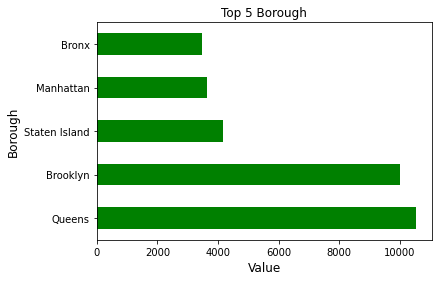

In [ ]:
df['BOROUGH'].value_counts().plot(kind = 'barh',
                                  color = 'green')

plt.title('Top 5 Borough', fontsize = 12)
plt.xlabel('Value', fontsize = 12 )
plt.ylabel('Borough', fontsize = 12)
plt.show()

In [ ]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R2,620000.0,2016,December,30,Friday
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,762669.0,2016,September,21,Wednesday
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,772851.0,2016,September,12,Monday
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1005,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,1034880.0,2016,November,3,Thursday
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,324 EAST 4TH STREET,10009.0,1,...,2325.0,1680.0,1920.0,2,R4,800000.0,2016,September,7,Wednesday


# **KESIMPULAN ANALYISIS**

## **D. Measure of Central Tedency**

### **1. Measure of Central Tedency: Mean**

**Question :**

1.   Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Manhattan?




**Answer no. 1**

In [ ]:
avg_answer1 = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].mean()
print('Mean dari harga jual property di Manhattan sekitar :', avg_answer1)

Mean dari harga jual property di Manhattan sekitar : 1093167.214659686


**Answer no. 2**

In [ ]:
avg_answer2 = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].mean()
print(avg_answer2)

2316.296224855332


### **2. Measure of Central Tedency: Median**

**Question :**

1.   Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Manhattan?




**Answer no. 1**

In [ ]:
median_answer1 = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].median()
print('Mean dari harga jual property di Manhattan sekitar :', median_answer1)

Mean dari harga jual property di Manhattan sekitar : 1050000.0


**Answer no. 2**

In [ ]:
median_answer2 = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].median()
print(median_answer2)

2325.0


### **3. Measure of Central Tedency: Modus**

**Question :**

1.   Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Manhattan?




In [ ]:
modus_answer1 = df[df['BOROUGH']=='Manhattan']['BUILDING CLASS CATEGORY']
modus_bcs = scistats.mode(modus_answer1)

print(modus_bcs.mode)
print(modus_bcs.count)

['13 CONDOS - ELEVATOR APARTMENTS            ']
[3257]


In [ ]:
# Membuat dataframe baru yang hanya terdapat kolom Manhattan BOROUGH dan GROSS SQUARE FEET
modus_answer2 = df[df['BOROUGH']=='Manhattan']['GROSS SQUARE FEET']
modus_gsf = scistats.mode(modus_answer2)

# Mencetak informasi modus dan jumlah munculnya modus tersebut
print(modus_gsf.mode)
print(modus_gsf.count)

[1680.]
[3588]


## **E. Measured of Spread**

### **1. Measured of Spread: Range**

**Question:**

1.   Berapakah range/rentang data dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa range/rentang data dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Manhattan?

**Answer no. 1**

In [ ]:
df_max = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].max()
df_min = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Manhattan adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Nilai harga jual tertinggi di wilayah Manhattan adalah 2100000.0
Nilai harga jual terendah di wilayah Manhattan adalah 1.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 2099999.0


**Answer no. 2**

In [154]:
df_max = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].max()
df_min = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Manhattan adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Nilai harga jual tertinggi di wilayah Manhattan adalah 2325.0
Nilai harga jual terendah di wilayah Manhattan adalah 384.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 1941.0


### **2. Measured of Spread: Variance**

**Question:**

1.   Berapakah range/rentang data dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa range/rentang data dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Manhattan?

**Answer no. 1**

In [ ]:
df_max = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].max()
df_min = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Manhattan adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Nilai harga jual tertinggi di wilayah Manhattan adalah 2100000.0
Nilai harga jual terendah di wilayah Manhattan adalah 1.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 2099999.0


**Answer no. 2**

In [ ]:
df_max = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].max()
df_min = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Manhattan adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Nilai harga jual tertinggi di wilayah Manhattan adalah 2325.0
Nilai harga jual terendah di wilayah Manhattan adalah 384.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 1941.0
